In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import glob
import os
from astropy.io import fits
import numpy as np
import multiprocessing

import stack

np.seterr(divide='ignore', invalid='ignore')

dir_drp = '/Users/astro/Documents/notebooks/manga/spectro/redux/v2_5_3/'
dir_dap = '/Users/astro/Documents/notebooks/manga/spectro/analysis/MPL-8/HYB10-MILESHC-MILESHC/'
dir_res = '/Users/astro/Documents/notebooks/zs/pair-m-z/stack_11_16_0_1re/'
file_drp='/Users/astro/Documents/notebooks/manga/spectro/analysis/MPL-8/drpall-v2_5_3.fits'

def stacking(plateifu):
    print(plateifu)
    with fits.open(file_drp) as f_drp:
        plateifu_drp=f_drp[1].data.field('plateifu')
        z=f_drp[1].data.field('z')
        index_ifu=np.where(plateifu_drp==plateifu)[0]
        z_ifu=z[index_ifu]
#         print(z_ifu)
        plate = plateifu.split('-')[0]
        ifu = plateifu.split('-')[1]
        f_map = dir_dap+plate+'/'+ifu+'/manga-'+plate + \
            '-'+ifu+'-MAPS-HYB10-MILESHC-MILESHC.fits.gz'
        f_cube = dir_drp+plate+'/stack/manga-'+plate + \
            '-'+ifu+'-LOGCUBE.fits.gz'
        if os.path.exists(f_map) and os.path.exists(f_cube):
            cube = fits.open(f_cube)
            wave = cube['WAVE'].data
            flux_t = np.transpose(cube['FLUX'].data, axes=(1, 2, 0))
            ivar_t = np.transpose(cube['IVAR'].data, axes=(1, 2, 0))

            mapf = fits.open(f_map)
            flux_map = mapf['EMLINE_GFLUX'].data
            ivar_map = mapf['EMLINE_GFLUX_IVAR'].data
            mask_map = mapf['EMLINE_GFLUX_MASK'].data
            ellcoo = mapf['SPX_ELLCOO'].data[1]
            stellar_vel = mapf['STELLAR_VEL'].data


            stack.stack(plateifu, wave, flux_t, ivar_t, flux_map, ivar_map,
                              mask_map, ellcoo, stellar_vel,dir_res,z_ifu)



if __name__ == '__main__':
    dir_drpall = '/Users/astro/Documents/notebooks/manga/spectro/analysis/MPL-8/drpall-v2_5_3.fits'
    f = fits.open(dir_drpall)
    data = f[1].data
    plateifu = data.field('plateifu')

    print('              start                  :')
    pool=multiprocessing.Pool(processes=8)
    pool.map(stacking,plateifu)
    pool.close()
    pool.join()
    print('              finished               .')
    

              start                  :
10217-3702
10001-12701
10503-9102
7443-3702
7977-6104
8084-1902
8141-12701
8155-3702
8084-3701
7443-3703
7443-3704
10217-3703
8155-3703
7977-9101
8084-3702
7443-6101
10217-3704
8155-3704
10504-12701
10001-12702
8141-12702
8084-3703
10217-6101
8155-6101
7977-9102
7443-6102
8084-3704
10217-6102
8155-6102
8084-6101
10504-12702
7443-6103
10001-12703
7979-12701
8141-12703
10217-6103
8155-6103
8084-6102
7443-6104
10217-6104
10504-12703
8155-6104
7443-9101
8084-6103
10001-12704
8141-12704
7979-12702
10217-9101
8155-9101
8084-6104
7443-9102
10504-12704
10217-9102
8084-9101
10001-12705
7979-12703
8141-12705
8155-9102
7444-12701
7444-12702
7444-12703
7444-12704
7444-12705
7444-1901
7444-1902
7444-3701
7444-3702
7444-3703
7444-3704
7444-6101
7444-6102
7444-6103
7444-6104
7444-704
7444-708
7444-9101
7444-9102
7495-12701
10218-12701
8084-9102
10504-12705
8156-12701
10001-1901
8141-1901
7979-12704
10001-1902
8141-1902
10001-3701
7495-12702
8141-3701
8085-12701


10216-1902
8146-3702
8132-12702
10509-3704
10216-3701
8243-12703
8146-3703
7960-12703
10509-6101
10216-3702
7993-1901
8146-3704
7993-1902
10492-12703
10216-3703
10509-6102
8132-12703
7993-3701
8146-6101
8243-12704
10216-3704
7993-3702
10509-6103
7960-12704
10216-6101
8146-6102
7993-3703
10492-12704
10509-6104
8132-12704
8243-12705
10216-6102
8146-6103
7993-3704
7960-12705
10509-9101
7993-6101
10216-6103
8146-6104
10492-12705
8132-12705
7993-6102
8243-1901
10509-9102
10216-6104
8146-9101
8243-1902
7960-1901
8243-3701
7993-6103
7960-1902
10492-1901
10216-9101
10510-12701
8132-1901
8243-3702
7960-3701
10492-1902
8146-9102
7993-6104
8132-1902
10492-3701
8243-3703
7960-3702
8132-3701
10216-9102
10492-3702
7993-9101
8243-3704
7960-3703
8147-12701
10510-12702
8132-3702
10492-3703
8243-6101
7960-3704
10217-12701
8132-3703
10492-3704
7993-9102
7960-6101
8243-6102
8132-3704
10492-6101
8147-12702
10510-12703
8132-6101
7960-6102
8077-12701
8243-6103
10492-6102
10217-12702
8132-6102
7960-6103
8243-

In [97]:
a=np.array([-0.5453526973724365, -0.5397058129310608, -0.5511478781700134,-0.6038869023323059, -0.5872294902801514, -0.6009038686752319])
b=np.array([0.1288808137178421, 0.1780097633600235, 0.20957136154174805,0.2638080418109894, 0.20070762932300568, 0.22937193512916565])
mask=(b<=0.61/(a-0.05)+1.3)&(a<0.05)&(b<=0.61/(a-0.49)+1.19)
mask

array([ True,  True,  True,  True,  True,  True])

In [85]:
a=np.array([1,2,3,4,5,6])
mask=(a>3)
mask


array([False, False, False,  True,  True,  True])

(396,) (396,)


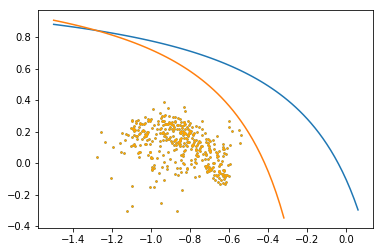

In [94]:
dir_res = '/Users/astro/Documents/notebooks/zs/pair-m-z/stack_11_16_0_1re/'
with fits.open(dir_res+'s_x_y.fits') as f:
    data=f[1].data
    x=data['x']
    y=data['y']
    
    x_bpt = np.arange(-1.5, 0.07, 0.02)
    y_bpt = 0.61/(x_bpt-0.47)+1.19
    x_bpt1 = np.arange(-1.5, -0.3, 0.02)
    y_bpt1 = 0.61/(x_bpt1-0.05)+1.3
    
    mask=(y<0.61/(x-0.05)+1.3)&(x<0.05)&(y<(0.61/(x-0.47)+1.19))
    mask_1=(1-mask).astype(np.bool)
    print(x.shape,y.shape)
    plt.figure()
    plt.plot(x_bpt,y_bpt)
    plt.plot(x_bpt1,y_bpt1)
    plt.scatter(x,y,s=2)
    plt.scatter(x[mask],y[mask],s=2,color='orange')

    plt.show()

In [91]:
x=np.array([-0.5453527])
y=np.array([0.12888081])


mask=(y<0.61/(x-0.05)+1.13)&(x<0.05)&(y<(0.61/(x-0.47)+1.19))
mask

array([False])

In [92]:
0.61/(-0.5453527-0.05)+1.13

0.10539727291066292

In [57]:
b=np.array([[2,3,4],[5,6,7],[8,9,10]])

In [60]:
a_1=np.ma.array(a,mask=(a<6))

In [61]:
b_1=np.ma.array(b,mask=(b<6))

In [62]:
a_1/b_1

masked_array(
  data=[[--, --, --],
        [--, --, 0.8571428571428571],
        [0.875, 0.8888888888888888, 0.9]],
  mask=[[ True,  True,  True],
        [ True,  True, False],
        [False, False, False]],
  fill_value=1e+20)

In [63]:
a_1

masked_array(
  data=[[--, --, --],
        [--, --, 6],
        [7, 8, 9]],
  mask=[[ True,  True,  True],
        [ True,  True, False],
        [False, False, False]],
  fill_value=999999)

In [65]:
b_1

masked_array(
  data=[[--, --, --],
        [--, 6, 7],
        [8, 9, 10]],
  mask=[[ True,  True,  True],
        [ True, False, False],
        [False, False, False]],
  fill_value=999999)